### Final Project Submission

Please fill out:
* Student name: Brian Lee
* Student pace: Full time
* Scheduled project review date/time: --
* Instructor name: Victor
* Blog post URL: -- 

# Movie Analysis

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***

Questions to consider:

* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?

In [63]:
## Write thoughts here:

# Figure out what movies do well at the box office for Microsoft
#  * Movie Genre
#  * Movie cost to return

## Using info from IMDB, Rotten Tomatoes, etc, figure out with data what will play into "success"
#  Use Data visualizations to help prove point

## Data Understanding

Describe the data being used for this project.

Movie datasets from: 

* Box Office Mojo
* IMDB
* Rotten Tomatoes 
* TheMovieDB
* The Numbers

Minimum datasets to use:

* imdb.title.basics
* imdb.title.ratings
* bom.movie_gross
***

Questions to consider:

* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?

In [64]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import pyplot

%matplotlib inline

### IMDB data

In [65]:
# May be good to query the databases with sqlite3 as they contain various keys to connect various tables (after clearning data)
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [66]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Box Office Mojo

In [67]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Rotten Tomatoes data

In [68]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter="\t")
movie_info.head()
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [69]:
# try:
#     movie_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter="\t")
#     movie_reviews.head()
# except Exception as e:
#     print(e)

In [70]:
rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', header=0)
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [71]:
rt_reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter='\t',header=0, encoding='latin-1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [72]:
# Unusable data - no related titles. Will opt to not use data sets from Rotten Tomatoes

In [178]:
df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### The Numbers data

In [73]:
## Movie budgets - The Numbers
# Has production budget, domestic/worldwide gross

movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets.head()
# movie_budgets.isna().sum() # no missing values

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [74]:
# Titles will be dificult to compare with that of others. Maybe better to create a separate visualization with purely this data.
# Will need to merge the genres to this table in order to get the correct information

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***

Questions to consider:

* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?

### IMDB Data

* We need to merge data from tables using the primary key of 'tconst'
* Clean data for duplicates and NaN items
* We need to separate and create new columns, or create list with genres options for each movie

In [96]:
# Merging datasets using primary key of 'tconst'
imdb_df = title_basics.merge(title_ratings, how="inner", on='tconst')

In [97]:
# Need to split genres into a searchable list and reinsert OR can make list of genres be columns with 0,1 indicator
length = range(len(imdb_df['genres']))
for i in length:
    if type(imdb_df.loc[i,'genres']) == str:
        imdb_df.at[i, 'genres'] = imdb_df.loc[i, 'genres'].split(',')
    else:
        continue
imdb_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,[Documentary],6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"[Drama, Family]",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,[Documentary],8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [98]:
# missing data in runtime_minutes and genres. We probably want to remove items without genre as it is defining trait
# imdb_df['genres'].unique()

imdb_df.dropna(subset=['genres'], inplace=True)
imdb_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

In [99]:
# We do not need the 'tconst' and 'runtime_minutes' in our data set. Will drop columns
imdb_df.drop(['runtime_minutes'],axis=1, inplace=True)
imdb_df.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119


In [100]:
# Setting index to primary_title 
imdb_df.set_index('tconst',inplace=True)

In [19]:
# Check again for missing data items
imdb_df.isna().sum()

original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [20]:
# Final check on dataset
imdb_df

,original_title,start_year,genres,averagerating,numvotes
primary_title,,,,,
Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517
Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13
The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119
...,...,...,...,...,...
Swarm Season,Swarm Season,2019,[Documentary],6.2,5
Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6
Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136


### Box Office Mojo Data:

In [21]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [22]:
display(len(movie_gross))
display(movie_gross.info())
movie_gross.isna().sum()

# around 1/3 of foreign_gross is missing.
# should do a separate analysis for domestic/foreign when graphing. domestic/foreign success is not 100% correlated

3387

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [23]:
movie_gross.drop('studio',axis=1, inplace=True)
movie_gross

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [24]:
null_data = movie_gross[movie_gross.isnull().any(axis=1)]
null_data

,title,domestic_gross,foreign_gross,year
222,Flipped,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,NaN,1300000,2010
254,The Polar Express (IMAX re-issue 2010),673000.0,NaN,2010
267,Tiny Furniture,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),366000.0,NaN,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


## Data Modeling

Describe and justify the process for analyzing or modeling the data.

***

Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?

### IMDB Data Visualization:

* What genres are most common from movie industry
* What genres are leading to high ratings

In [25]:
# Analysis on ratings of movies
imdb_df['averagerating'].describe()
imdb_df

,original_title,start_year,genres,averagerating,numvotes
primary_title,,,,,
Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517
Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13
The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119
...,...,...,...,...,...
Swarm Season,Swarm Season,2019,[Documentary],6.2,5
Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6
Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136


In [101]:
# Get unique genres into a list
genre_dict = imdb_df['genres'].explode().value_counts().to_dict()
genre = list(genre_dict.keys())
display(genre)

# Get a count of total genres from list
genre_count = list(genre_dict.values())
genre_count

['Drama',
 'Documentary',
 'Comedy',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Crime',
 'Adventure',
 'Biography',
 'Family',
 'Mystery',
 'History',
 'Sci-Fi',
 'Fantasy',
 'Music',
 'Animation',
 'Sport',
 'War',
 'Musical',
 'News',
 'Western',
 'Reality-TV',
 'Adult',
 'Game-Show',
 'Short']

[30788,
 17753,
 17290,
 8217,
 7674,
 6988,
 6589,
 4611,
 3817,
 3809,
 3412,
 3039,
 2825,
 2206,
 2126,
 1968,
 1743,
 1179,
 853,
 721,
 579,
 280,
 17,
 3,
 2,
 1]

### Number of Genre Occurences in Movies

This visualization should help us get a general idea of the landscape of movies in the modern age

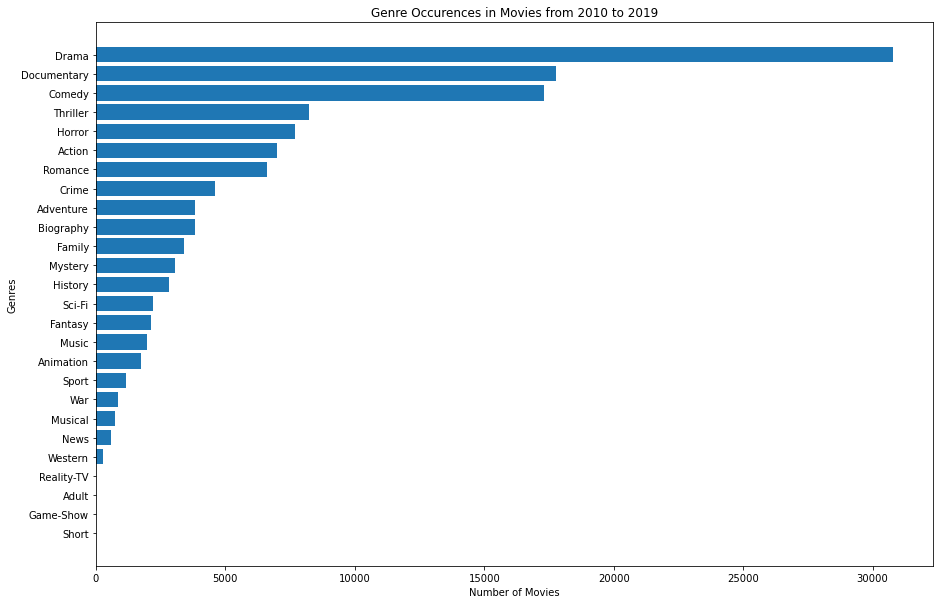

In [27]:
# Create plot
fig, ax = plt.subplots(figsize=(15, 10))

x = range(len(genre))
# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.barh(x, genre_count, tick_label=genre)

# Give a title to the bar graph and label the axes
ax.set_title("Genre Occurences in Movies from 2010 to 2019")
ax.set_ylabel("Genres")
ax.set_xlabel("Number of Movies");
ax.invert_yaxis();

In [28]:
# Drama is the most generic genre; thus highest number
# Documentary and comedy appear next frequently
# Thriller, Horror, Action, Romance all have around 7500-10k movies. They seem to be more defining movie genres

### Average Reviews per Genre

Let's visualize genres and ratings relations

In [102]:
# imdb_df.reset_index()
# imdb_df.set_index('genres')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, tt0063540 to tt9916160
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   73052 non-null  object 
 1   original_title  73052 non-null  object 
 2   start_year      73052 non-null  int64  
 3   genres          73052 non-null  object 
 4   averagerating   73052 non-null  float64
 5   numvotes        73052 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.9+ MB


In [107]:
# imdb_df['genres'].explode()
genre_title = imdb_df['genres'].explode().to_frame()
genre_title

,genres
tconst,
tt0063540,Action
tt0063540,Crime
tt0063540,Drama
tt0066787,Biography
tt0066787,Drama
...,...
tt9913084,Documentary
tt9914286,Drama
tt9914286,Family


In [108]:
genre_rating = genre_title.merge(imdb_df, on='tconst')
genre_rating

,genres_x,primary_title,original_title,start_year,genres_y,averagerating,numvotes
tconst,,,,,,,
tt0063540,Action,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0063540,Crime,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0063540,Drama,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0066787,Biography,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
tt0066787,Drama,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
...,...,...,...,...,...,...,...
tt9913084,Documentary,Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6
tt9914286,Drama,Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136
tt9914286,Family,Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136


In [110]:
genre_rating.drop('genres_y', axis=1, inplace=True)

In [121]:
genre_rating.rename(columns={"genres_x":"genres","averagerating":"avg_rating","numvotes":"num_votes"},inplace=True)

<AxesSubplot:>

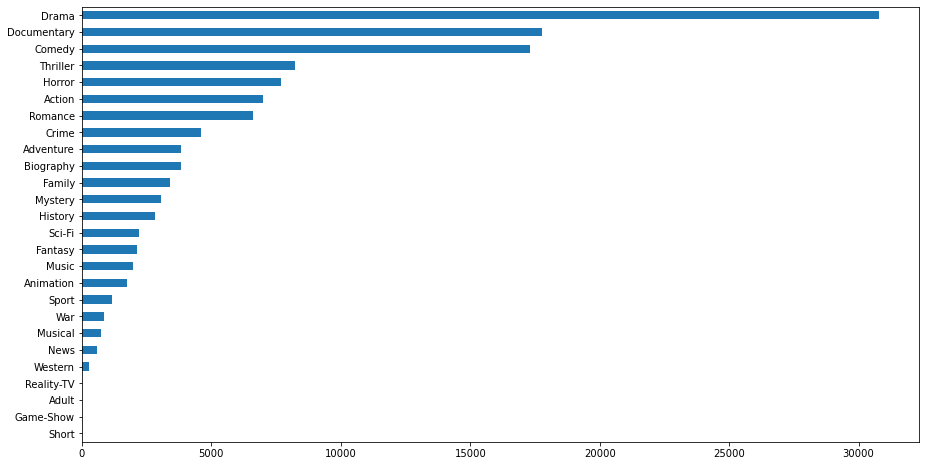

In [182]:
genre_rating['genres'].value_counts().sort_values().plot(kind='barh', figsize=(15,8))

In [124]:
genre_rating.groupby(['genres'])['avg_rating'].mean().sort_values()

genres
Adult          3.766667
Horror         5.003440
Sci-Fi         5.489755
Thriller       5.639114
Action         5.810361
Western        5.868214
Fantasy        5.919473
Mystery        5.920401
Comedy         6.002689
Crime          6.115441
Romance        6.146608
Adventure      6.196201
Animation      6.248308
Family         6.394725
Drama          6.401559
Musical        6.498336
Reality-TV     6.500000
War            6.584291
Sport          6.961493
History        7.040956
Music          7.091972
Biography      7.162274
News           7.271330
Game-Show      7.300000
Documentary    7.332090
Short          8.800000
Name: avg_rating, dtype: float64

<AxesSubplot:ylabel='genres'>

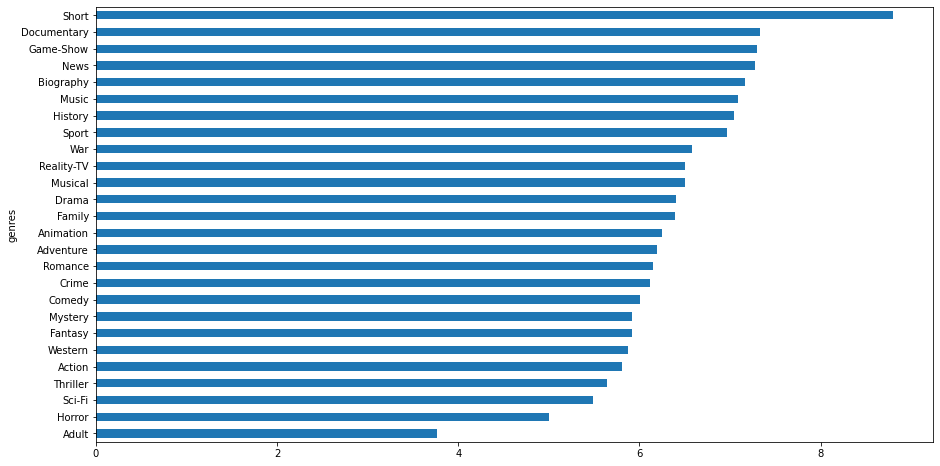

In [176]:
genre_rating.groupby(['genres'])['avg_rating'].mean().sort_values().plot(kind='barh', figsize=(15,8))

In [125]:
genre_rating.groupby(['genres'])['num_votes'].sum().sort_values()
# Short may be rated highest, but has the fewest votes. Let's ignore.

genres
Short                  8
Adult                164
Reality-TV           459
Game-Show           3469
News              123319
Musical          1387965
Western          2452376
War              2684725
Sport            3755824
Documentary      4739345
Music            5453369
History          7843349
Family           8636710
Animation       15353302
Biography       21609446
Horror          23884695
Mystery         24657286
Fantasy         26335704
Romance         26913873
Crime           39631356
Sci-Fi          42960289
Thriller        48155313
Comedy          74305805
Adventure       84232589
Action         101161682
Drama          119567500
Name: num_votes, dtype: int64

### Checking genres and profit (gross)

Let's visualize genre to gross using BOM dataset

In [149]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [150]:
display(movie_gross.info())
display(movie_gross.head(20))
movie_gross.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [151]:
# Replace zero values for gross values with 0
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(0)
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)
movie_gross.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [154]:
movie_gross['foreign_gross'] = movie_gross.apply(lambda x: change_money(x['foreign_gross']), axis=1)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [156]:
movie_gross['worldwide_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [157]:
# Merge genre and gross tables
genre_profit = genre_rating.merge(movie_gross, left_on="primary_title", right_on="title")
genre_profit

,genres,primary_title,original_title,start_year,avg_rating,num_votes,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Action,Wazir,Wazir,2016,7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
1,Crime,Wazir,Wazir,2016,7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
2,Drama,Wazir,Wazir,2016,7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
3,Adventure,On the Road,On the Road,2012,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,Drama,On the Road,On the Road,2012,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Drama,Helicopter Eela,Helicopter Eela,2018,5.4,673,Helicopter Eela,Eros,72000.0,0.0,2018,72000.0
6974,Drama,Last Letter,"Ni hao, Zhihua",2018,6.4,322,Last Letter,CL,181000.0,0.0,2018,181000.0
6975,Romance,Last Letter,"Ni hao, Zhihua",2018,6.4,322,Last Letter,CL,181000.0,0.0,2018,181000.0
6976,Documentary,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,20300000.0


<AxesSubplot:ylabel='genres'>

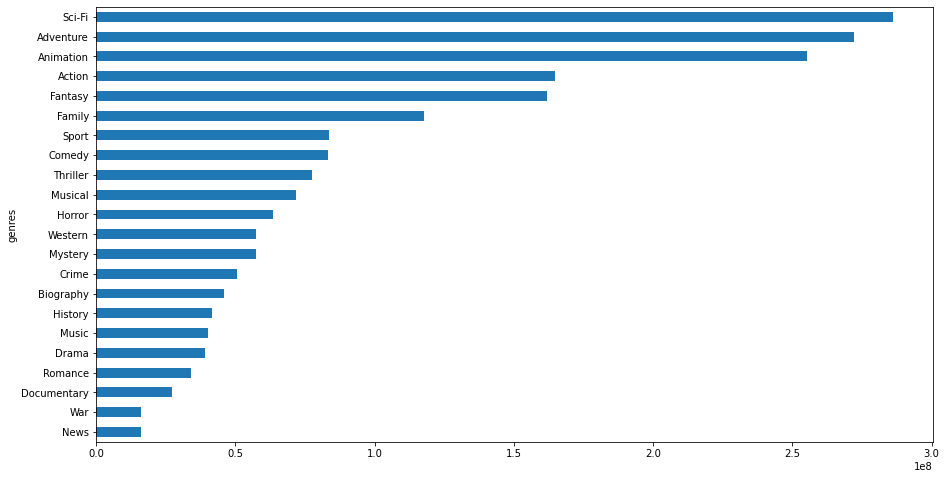

In [170]:
genre_profit.groupby(['genres'])['worldwide_gross'].mean().sort_values().plot(kind='barh', figsize=(15,8))

In [165]:
display(imdb_df['primary_title'].nunique())
display(genre_profit['primary_title'].nunique())
display(movie_gross['title'].nunique())

69248

2598

3386

In [166]:
genre_profit['primary_title'].sort_values()

4689                       '71
4688                       '71
4690                       '71
4299    1,000 Times Good Night
4298    1,000 Times Good Night
                 ...          
843                  Zookeeper
2216               Zoolander 2
5000                  Zootopia
5002                  Zootopia
5001                  Zootopia
Name: primary_title, Length: 6978, dtype: object

In [168]:
imdb_df['primary_title'].sort_values().head(20)

tconst
tt1699720                        !Women Art Revolution
tt2346170                             #1 Serial Killer
tt3120962                                           #5
tt5255986                                          #66
tt7853996                                 #ALLMYMOVIES
tt9844890                                    #AbroHilo
tt6170868                                        #BKKY
tt5074174                           #BeRobin the Movie
tt4353986                                      #Beings
tt6856592                                    #Captured
tt5803530                          #DigitalLivesMatter
tt4902162                                #Disneyland60
tt5460468                                      #Enough
tt4375578                       #Ewankosau saranghaeyo
tt8372826                             #Female Pleasure
tt5233106                                #FollowFriday
tt7272948                                    #Followme
tt5610972    #Hommes: True Story of the Thieves' World
tt3

### Checking relationship between budget and profit

Does higher budget result in higher profit?

What are the margins for budget that will lead to profits?

In [198]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

display(movie_budgets.info())
movie_budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [199]:
type(movie_budgets['production_budget'][0])

# This is a string. The numbers need to convert to an integar or float

str

In [200]:
def change_money(money):
    if type(money) == str:
        money = money.replace("$","").replace(",","")
        money = float(money) #changing to float in case of cents
        return money
    else:
        return money

change_money(movie_budgets['production_budget'][0]) #Test for example $425,000,000

425000000.0

In [201]:
# Adjust the values of dataframe to floats
movie_budgets['production_budget'] = movie_budgets.apply(lambda x: change_money(x['production_budget']), axis=1)
movie_budgets['domestic_gross'] = movie_budgets.apply(lambda x: change_money(x['domestic_gross']), axis=1)
movie_budgets['worldwide_gross'] = movie_budgets.apply(lambda x: change_money(x['worldwide_gross']), axis=1)

In [202]:
# View results
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [203]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


Text(0, 0.5, 'Total Profit')

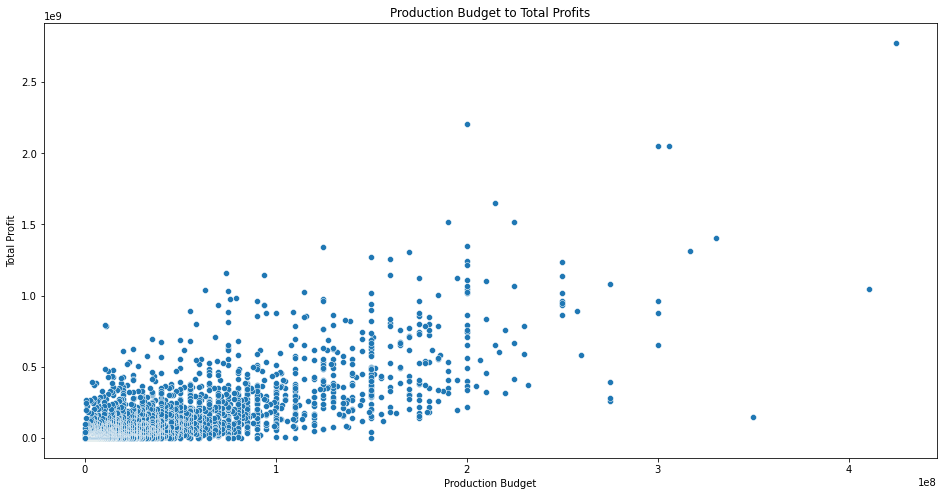

In [205]:
# Budget vs Profit
fig, ax = pyplot.subplots(figsize=(16,8))
sns.scatterplot(data=movie_budgets, x="production_budget", y="worldwide_gross");
ax.set_title('Production Budget to Total Profits')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Total Profit')

In [206]:
# Positive Corelation between production budget and profits gained(domestic + worldwide)
# May be best to go for a budget of 100-200 million

In [207]:
genre_budget = genre_rating.merge(movie_budgets, left_on="primary_title", right_on="movie")
genre_budget

,genres,primary_title,original_title,start_year,avg_rating,num_votes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Action,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,Animation,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
2,Comedy,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
3,Adventure,On the Road,On the Road,2012,6.1,37886,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
4,Drama,On the Road,On the Road,2012,6.1,37886,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6439,Documentary,Heroes,Heroes,2019,7.3,7,12,"Oct 24, 2008",Heroes,400000.0,655538.0,655538.0
6440,Documentary,Push,Push,2019,7.3,33,70,"Feb 6, 2009",Push,38000000.0,31811527.0,49678401.0
6441,Biography,Unplanned,Unplanned,2019,6.3,5945,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0
6442,Drama,Unplanned,Unplanned,2019,6.3,5945,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0


<AxesSubplot:ylabel='genres'>

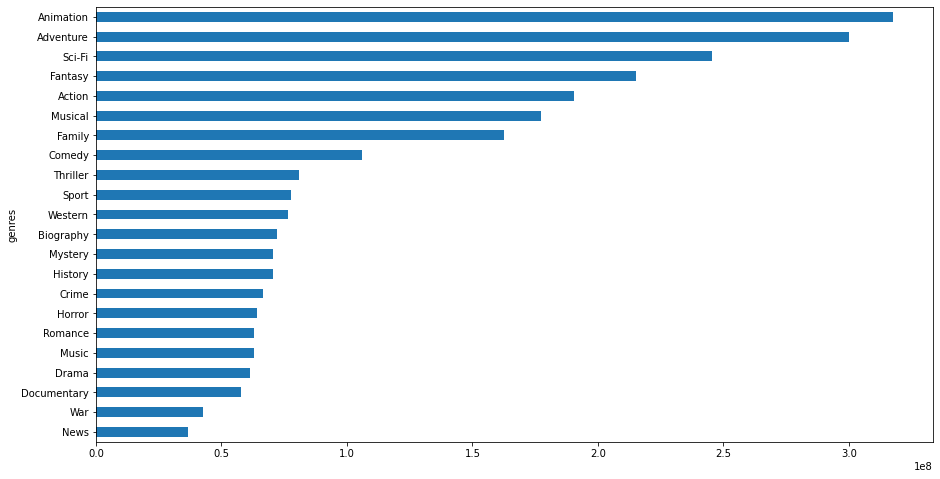

In [212]:
genre_budget.groupby(['genres'])['worldwide_gross'].mean().sort_values().plot(kind='barh',figsize=(15,8))

<AxesSubplot:ylabel='genres'>

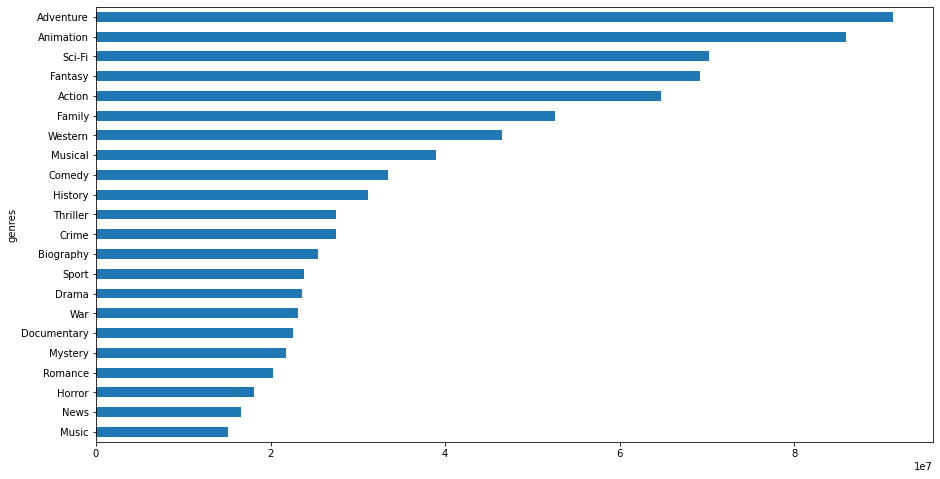

In [213]:
genre_budget.groupby(['genres'])['production_budget'].mean().sort_values().plot(kind='barh',figsize=(15,8))

## Evaluation

Evaluate how well your work solves the stated business problem.

***

Questions to consider:

* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?

In [ ]:
# Write thoughts here:

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

***

Questions to consider:

* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?

In [ ]:
# Write thoughts here:

## Next Steps: